# Sample Exploration

In this notebook, we explore a random sample of quotes from high-traffic US journals.
We choose to only sample from high-traffic journals for two reasons:

- We needed to narrow down the number of journals we are taking quotes from, as editor gender had to be added to the data manually, so we
    needed a subset small enough that we could do it in the time given.

- It made the most sense to us to use high-traffic journals, as we wanted to analyse quotes from journals that have the highest influence

In [ ]:
!pip install --upgrade pandas==1.3.4
!pip install chart_studio

In [66]:
# setup when running on google colab

from google.colab import drive
drive.mount('/content/drive/')
% cd /content/drive/MyDrive/Q-Bank/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [68]:
from collections import OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
import chart_studio

# set up configuration for chart studio
username='natasakrco'
key='UsdMt5rC8aKY0GjNkDNF'

chart_studio.tools.set_credentials_file(username=username, api_key=key)

import chart_studio.plotly as py
import chart_studio.tools as tls

In [69]:
# loading sample

filepath = './top_publishers/samples/'

quotes_female = pd.read_pickle(filepath + 'final_df_topic_label_editors_female.pkl')
quotes_male = pd.read_pickle(filepath + 'final_df_topic_label_editors_male.pkl')
quotes = pd.concat([quotes_female, quotes_male])

# loading metadata on journals
gender_ratio_media = pd.read_csv('./top_publishers/samples/gender_ratios.csv')
media_bias = pd.read_csv('./top_publishers/samples/media_bias.csv')

# Analysis in seaborn

Text(0.5, 0, 'Speaker Gender')

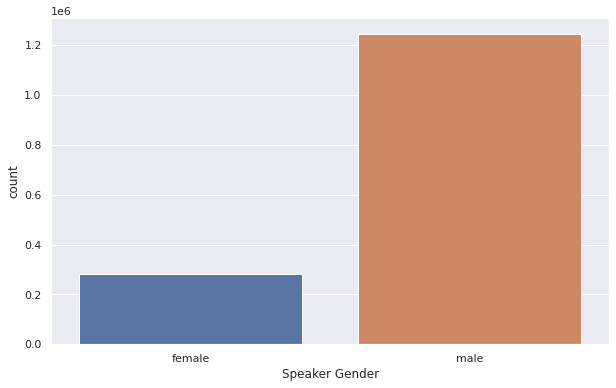

In [ ]:
# overall count of female vs male quotes

fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x=quotes['gender'], ax=ax)
ax.set_xlabel('Speaker Gender')
plt.savefig('plots/sample/genders.pdf')

In [ ]:
gender_ratio_media = gender_ratio_media.set_index('site_name')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


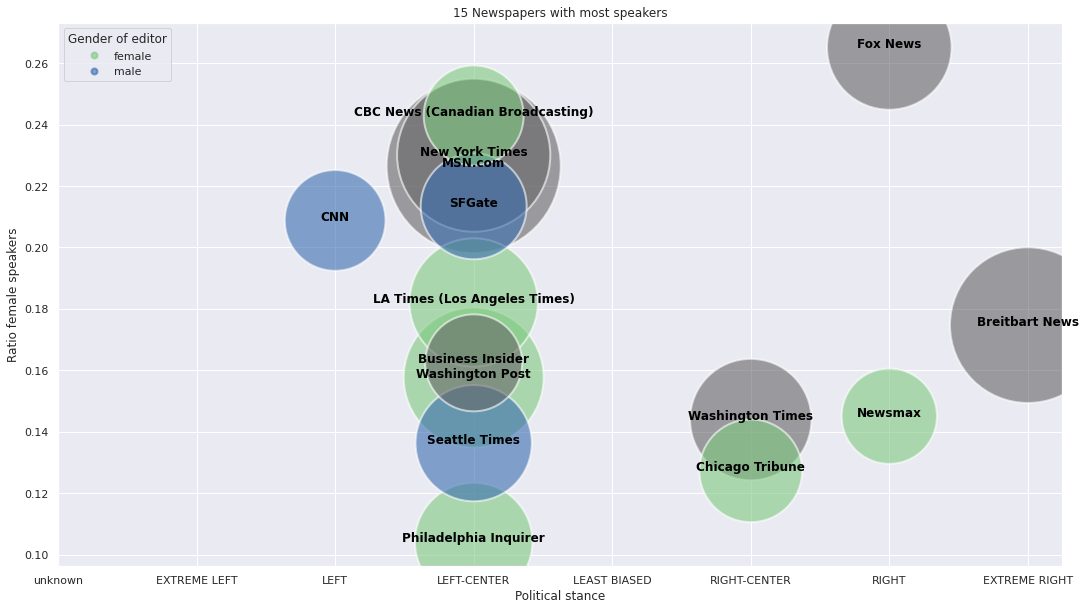

In [ ]:
# Plotting ratio of female speakers with respect to political stance,
# representing number of quotes from each journal by marker size

# Set the figure size
fig, ax = plt.subplots(figsize=(18, 10))

# Subset of the data for year 1952
data_top15 = gender_ratio_media[:15]
data_top15['editor_gender'] = pd.Categorical(data_top15['editor_gender'])
data_top15['bias'] = pd.Categorical(data_top15['bias'], categories = ['unknown', 'EXTREME LEFT', 'LEFT', 'LEFT-CENTER', 'LEAST BIASED', 'RIGHT-CENTER','RIGHT', 'EXTREME RIGHT'])

# Scatterplot
scatter = ax.scatter(
    x = data_top15['bias'].cat.codes, 
    y = data_top15['female_ratio'], 
    s=data_top15['total m/f']/3, 
    c=data_top15['editor_gender'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2)

# Add titles (main and on axis)
for i in range(len(data_top15.index)):
    ax.text(data_top15['bias'].cat.codes[i], data_top15['female_ratio'][i], data_top15.index[i], horizontalalignment='center', size='medium', color='black', weight='semibold')

ax.set_xlabel("Political stance")
ax.set_ylabel("Ratio female speakers")
ax.set_title("15 Newspapers with most speakers")
ax.set_xticks(np.arange(len(data_top15['bias'].cat.categories)))
ax.set_xticklabels(data_top15['bias'].cat.categories)
handles, labels = scatter.legend_elements()
labels = data_top15['editor_gender'].cat.categories
ax.legend(handles, labels , loc="upper left", title="Gender of editor")
plt.savefig('./plots/sample/genders_stance_ratio_1.pdf')
plt.show()

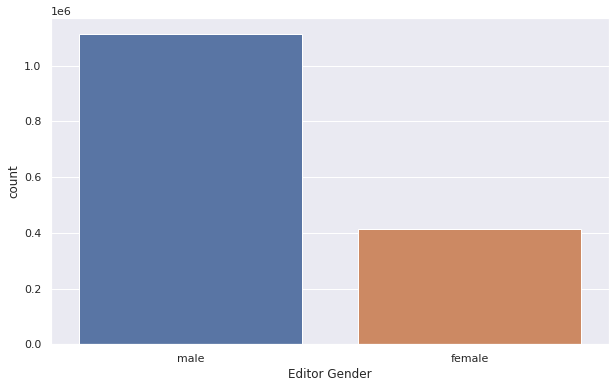

In [ ]:
# overall count of female vs male editors

fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(x=quotes['editor_gender'], ax=ax)
ax.set_xlabel('Editor Gender')
plt.savefig('plots/sample/editor_genders.pdf')

Text(0.5, 1.0, 'Bias and Factual Reporting Rating of Journals')

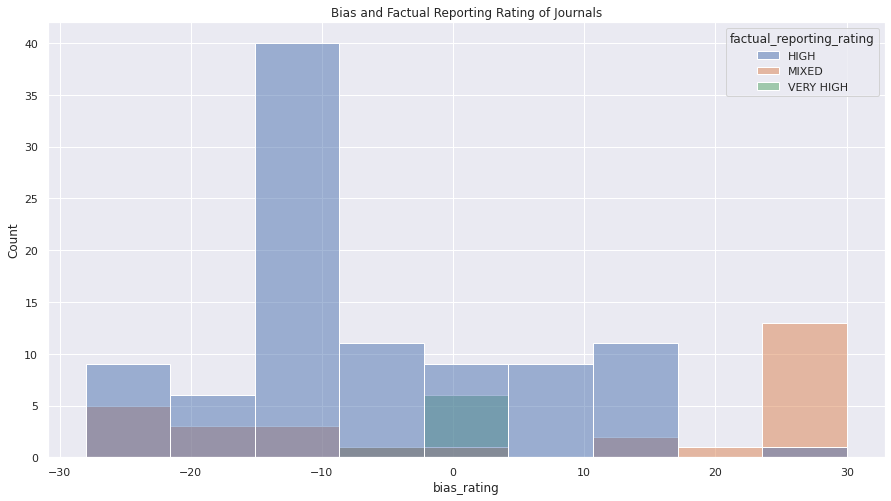

In [ ]:
# bias rating distribution, with factual reporting rating

fig,axs = plt.subplots(1, figsize=(15,8))
sns.histplot(x=media_bias.bias_rating, hue=media_bias.factual_reporting_rating, ax=axs)
axs.set_title('Bias and Factual Reporting Rating of Journals')

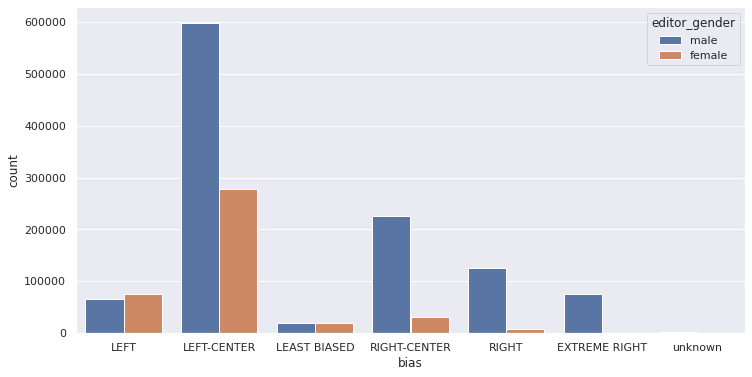

In [ ]:
# Number of female vs male editors with respect to political stance of journal

fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.countplot(data = quotes, x='bias', hue='editor_gender', ax=ax, order=['LEFT', 'LEFT-CENTER',
                                                                             'LEAST BIASED', 'RIGHT-CENTER',
                                                                             'RIGHT', 'EXTREME RIGHT', 'unknown'] )
plt.savefig('plots/sample/bias_genders.pdf')

In [ ]:
quotes.head()

,quoteID,quotation,speaker,qids,date,probas,gender,bias,reporting,site_name,editor,editor_gender,bias_rating,factual_reporting_rating,traffic,urls,domain,url,domains,prepro_quotes
0,2015-04-21-021692,"I knew how it was going to end, although we di...",Joelle Carter,Q456381,2015-04-21 21:12:00,0.6699,female,LEFT-CENTER,HIGH,ABC News,Craig McMurtrie,male,-13.0,HIGH,High Traffic,None,None,None,None,"[shoot, justify]"
1,2015-03-13-100477,Where this gets to be a problem is when a pati...,Sophia Smith,Q23409794,2015-03-13 09:38:46,0.9051,female,unknown,HIGH,AL.com (Alabama News),Kelly Ann Scott,female,13.0,HIGH,High Traffic,None,None,None,None,"[problem, patient, trouble, hospital, follow, ..."
2,2015-10-27-078118,limits girls' mechanisms for resisting others'...,Karin Martin,Q21337910,2015-10-27 01:11:46,0.7648,female,LEFT-CENTER,MIXED,American Thinker,Thomas Lifson,male,27.0,MIXED,High Traffic,None,None,None,None,"[limit, mechanism, resist, mistreatment]"
3,                 ,It started as a way of having a party right af...,Liz Williams,Q42407511,2015-11-18 17:46:00,0.8515,female,RIGHT-CENTER,HIGH,AOL,Cyndi Stivers,female,-14.0,HIGH,High Traffic,None,None,None,None,"[start, party, midnight]"
4,2015-11-01-005324,are right about the law,Lee Sheppard,Q14954839,2015-11-01 06:01:00,0.4777,female,LEFT-CENTER,HIGH,Arizona Republic,Greg Burton,male,12.0,HIGH,High Traffic,None,None,None,None,[right]


# Analysis in Plotly

## Topics stats

In [283]:
# loading datasets of quotes with topics

topics_female = pd.read_pickle('top_publishers/samples/df_topic_label_editors_female.pkl')
topics_male = pd.read_pickle('top_publishers/samples/df_topic_label_editors_male.pkl')

In [284]:
# replace topic labels with interpretable names

female_topics = {0:'Lifestyle',
 1:'Health',
 2:'Business',
 3:'Politics/Elections',
 4:'Personal Stories',
 5:'Politics',
 6:'Social/Community Issues'}
topics_female = topics_female.replace(female_topics)

male_topics = {0:'Sports',
 1:'Politics/Elections',
 2:'Politics',
 3:'Business',
 4:'Global Issues',
 5:'Personal Stories',
 6:'Social/Community Issues'}
topics_male = topics_male.replace(male_topics)

In [72]:
df = pd.concat([topics_female, topics_male])

In [73]:
# get dataframes for plots - count number of quotes for each topic

plot_df_female = topics_female.groupby(['topic_label']).count().reset_index()
plot_df_male = topics_male.groupby(['topic_label']).count().reset_index()

In [ ]:
# calculate proportion of quotes for each topic

plot_df_female = plot_df_female[['topic_label', 'quotation']]
plot_df_female['gender'] = ['female' for i in range(len(plot_df_female))]
plot_df_female['proportion'] = plot_df_female.quotation.map(lambda x: x/topics_female.quotation.nunique())

plot_df_male = plot_df_male[['topic_label', 'quotation']]
plot_df_male['gender'] = ['male' for i in range(len(plot_df_male))]
plot_df_male['proportion'] = plot_df_male.quotation.map(lambda x: x/topics_male.quotation.nunique())

In [75]:
plot_df = pd.concat([plot_df_female, plot_df_male])

In [76]:
# plot proportions of quotes that fall into each topic

topic_proportions = px.bar(plot_df,
       x='topic_label',
       y='proportion',
       color='gender',
       color_discrete_map={'male':'pink', 'female':'lightblue'},
       barmode='group')

In [77]:
topic_proportions

In [26]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

specs = [[{}, {}]]
fig = make_subplots(rows=1, cols=2, subplot_titles=('male', 'female'), specs=specs)#, title='Topics in Male vs Female Quotes')

fig.add_trace(
    #go.Pie(labels=list(plot_df_male.topic_label),
    #       values=list(plot_df_male.quotation)),
    go.Bar(x=list(plot_df_male.topic_label),
           y=list(plot_df_male.quotation)),
    row=1,
    col=1,
)
#fig = px.histogram(df, x="topic_label",
#                   color_discrete_sequence=['lightblue', 'pink'], facet_col='gender')#, y="Number Eaten", color="Contestant", barmode="group")

fig.add_trace(
    go.Bar(x=list(plot_df_female.topic_label),
            y=list(plot_df_female.quotation)),
    row=1,
    col=2
)
#fig = px.pie(plot_df_male, values='quotation', names='topic_label')
fig.update_layout(height=400, width=1200, title_text="Topics in Male vs Female Quotes")
fig.show()

In [78]:
# set up plotly chart studio for embeding plots into the webpage

import chart_studio
username='natasakrco'
key='UsdMt5rC8aKY0GjNkDNF'

chart_studio.tools.set_credentials_file(username=username, api_key=key)

import chart_studio.plotly as py
import chart_studio.tools as tls

In [63]:
# save topic proportions plot to chart studio

py.plot(topic_proportions,filename='topic_proportions', auto_open=True)

'https://plotly.com/~natasakrco/7/'

In [118]:
# make dataframe for plotting - count quotes per speaker gender, separated by gender of the editor of the journal

plot_df3 = quotes.groupby(['editor_gender', 'gender']).count().reset_index()[['editor_gender', 'gender', 'quotation']]

total_female_editor = plot_df3.groupby('editor_gender').sum().iloc[0].item()
total_male_editor = plot_df3.groupby('editor_gender').sum().iloc[1].item()

In [139]:
# make dataframe for plotting - count quotes per topic, separated by gender of the editor of the journal

plot_df4 = df.groupby(['editor_gender', 'topic_label']).count().reset_index()

In [142]:
# get separate dataframes with quotes from journals with female or male editors

female_editor = df[df.editor_gender=='female']
male_editor = df[df.editor_gender=='male']

# get quote count for each topic

f_plot = female_editor.groupby('topic_label').count().reset_index()
m_plot = male_editor.groupby('topic_label').count().reset_index()

In [149]:
# get proportion of quotes falling into each topic

f_plot['proportion'] = f_plot['quotation']/len(female_editor)
m_plot['proportion'] = m_plot['quotation']/len(male_editor)
f_plot['editor_gender'] = ['female' for i in range(len(f_plot))]
m_plot['editor_gender'] = ['male' for i in range(len(m_plot))]

In [150]:
plot_df4 = pd.concat([f_plot, m_plot])

In [151]:
# plot proportions of quotes that fall into each topic

px.bar(plot_df4,
       x='topic_label',
       y='proportion',
       color='editor_gender',
       color_discrete_map={'male':'pink', 'female':'lightblue'},
       barmode='group')

In [244]:
topics_about_women = pd.read_pickle('./final_repo/COmparison_women_men_in_quotes/top_quotes_female_about_gdsmm_df_incl_prepro_quotes_topiclabel_dropempty.pkl')
topics_about_men = pd.read_pickle('./final_repo/COmparison_women_men_in_quotes/top_quotes_male_about_gdsmm_df_incl_prepro_quotes_topiclabel_dropempty.pkl')

In [245]:
# map topic labels to names

topics_women = {0: 'Healthcare & \n Reproductive Rights',
                1: 'Lifestyle', 2: 'Politics', 3: 'Family & Work',
                4: 'Gender Issues', 5: 'Sports and Culture', 6: 'Social and Family Disasters'}
topics_men = {0: 'Lifestyle', 1: 'Sexuality',
              2: 'Sports', 3: 'Serving Country & Work',
              4: 'Family', 5: 'Police and Politics',
              6: 'Political Border Issues'}

topics_about_women['topic_label'] = topics_about_women.topic_label.map(topics_women)
topics_about_men['topic_label'] = topics_about_men.topic_label.map(topics_men)

In [285]:
# get topic proportions in quotes by women

grouped_women_general =  topics_female.groupby(['topic_label']).size()
grouped_women_general_prop = grouped_women_general.transform(lambda x: x / grouped_women_general.sum())
grouped_women_general_prop = grouped_women_general_prop.sort_values(ascending= False)
grouped_women_general_prop = pd.DataFrame(grouped_women_general_prop, columns=['proportion']).reset_index()

In [286]:
index_women = grouped_women_general_prop.topic_label.tolist()
index_women

['Personal Stories',
 'Social/Community Issues',
 'Business',
 'Politics',
 'Politics/Elections',
 'Lifestyle',
 'Health']

In [287]:
# get topic proportions in quotes by women in left-leaning journals

grouped_women_left =  topics_female[topics_female['bias'].str.contains("LEFT") == True].groupby(['topic_label']).size()
grouped_women_left_prop = grouped_women_left.transform(lambda x: x / grouped_women_left.sum())
grouped_women_left_prop = grouped_women_left_prop.reindex(index_women) 

grouped_women_left_prop = pd.DataFrame(grouped_women_left_prop, columns=['proportion']).reset_index()


In [288]:
# get topic proportions in quotes by women in right-leaning journals

grouped_women_right =  topics_female[topics_female['bias'].str.contains("RIGHT") == True].groupby(['topic_label']).size()
grouped_women_right_prop = grouped_women_right.transform(lambda x: x / grouped_women_right.sum())
grouped_women_right_prop = grouped_women_right_prop.reindex(index_women) 
grouped_women_right_prop = pd.DataFrame(grouped_women_right_prop, columns=['proportion']).reset_index()

In [289]:
# get topic proportions in quotes by men

grouped_men_general =  topics_male.groupby(['topic_label']).size()
grouped_men_general_prop = grouped_men_general.transform(lambda x: x / grouped_men_general.sum()).sort_values(ascending=False)
grouped_men_general_prop = pd.DataFrame(grouped_men_general_prop, columns=['proportion']).reset_index()
index_men = grouped_men_general_prop.topic_label.tolist()


# get topic proportions in quotes by men in left-leaning journals

grouped_men_left =  topics_male[topics_male['bias'].str.contains("LEFT") == True].groupby(['topic_label']).size()
grouped_men_left_prop = grouped_men_left.transform(lambda x: x / grouped_men_left.sum()).reindex(index_men)
grouped_men_left_prop = pd.DataFrame(grouped_men_left_prop, columns=['proportion']).reset_index()

# get topic proportions in quotes by men in right-leaning journals

grouped_men_right =  topics_male[topics_male['bias'].str.contains("RIGHT") == True].groupby(['topic_label']).size()
grouped_men_right_prop = grouped_men_right.transform(lambda x: x / grouped_men_right.sum()).reindex(index_men)
grouped_men_right_prop = pd.DataFrame(grouped_men_right_prop, columns=['proportion']).reset_index()


In [291]:
# plotting proportions of topics in quotes, separated by bias levels

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

specs = [[{}, {}], [{}, {}], [{}, {}]]
fig2 = make_subplots(rows=3, cols=2,
                    subplot_titles=('Overall - Women',
                                    'Left-leaning Media - Women',
                                    'Right-leaning Media - Women',
                                    'Overall - Men',
                                    'Left-leaning Media - Men',
                                    'Right-leaning Media - Men'),
                    specs=specs)

fig2.add_trace(
    go.Bar(x=grouped_women_general_prop.topic_label,
           y=grouped_women_general_prop.proportion,
           marker=dict(color=['lightblue', 'lightblue', 'lightblue',
                              'lightblue', 'lightblue', 'lightblue',
                              'lightblue'], coloraxis="coloraxis")),
    row=1,
    col=1)

fig2.add_trace(
    go.Bar(x=grouped_women_left_prop.topic_label,
           y=grouped_women_left_prop.proportion,
           marker=dict(color=['lightblue', 'lightblue', 'lightblue',
                              'lightblue', 'lightblue', 'lightblue',
                              'lightblue'], coloraxis="coloraxis")),
    row=2,
    col=1
)


fig2.add_trace(
    go.Bar(x=grouped_women_right_prop.topic_label,
           y=grouped_women_right_prop.proportion,
           marker=dict(color=['lightblue', 'lightblue', 'lightblue',
                              'lightblue', 'lightblue', 'lightblue',
                              'lightblue'], coloraxis="coloraxis")),
    row=3,
    col=1
)


fig2.add_trace(
    go.Bar(x=grouped_men_general_prop.topic_label,
           y=grouped_men_general_prop.proportion,
           marker=dict(color=['pink', 'pink', 'pink',
                              'pink', 'pink', 'pink',
                              'pink'], coloraxis="coloraxis")),
    row=1,
    col=2)

fig2.add_trace(
    go.Bar(x=grouped_men_left_prop.topic_label,
           y=grouped_men_left_prop.proportion,
           marker=dict(color=['pink', 'pink', 'pink',
                              'pink', 'pink', 'pink',
                              'pink'], coloraxis="coloraxis")),
    row=2,
    col=2
)


fig2.add_trace(
    go.Bar(x=grouped_men_right_prop.topic_label,
           y=grouped_men_right_prop.proportion,
           marker=dict(color=['pink', 'pink', 'pink',
                              'pink', 'pink', 'pink',
                              'pink'], coloraxis="coloraxis")),
    row=3,
    col=2
)


for trace in fig2['data']: 
    trace['showlegend'] = False

fig2.update_layout(height=1200, width=1000, title_text="Topics in Quotes by Women and Men")
fig2.show()

In [292]:
# save topic proportions plot to chart studio

py.plot(fig2,filename='topics_by_women_men', auto_open=True)

'https://plotly.com/~natasakrco/26/'